<a href="https://colab.research.google.com/github/saif-byte/DataSciencePortfolio/blob/main/Churn%20Prediction/Churn_or_not_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn or not Churn

In this project , we will train a model to predict whether the customer will stop using our services(churn) or will continue using our services(not churn). 
This model will be trained by using the dataset that have attributes of the customers that have previously churned. The dataset for this project is from kaggle named as [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). 
If our model predict that the customer is going to churn then we can send them promotional discoounts and email to sustain them.

In [304]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mutual_info_score, accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import pickle
import requests

from IPython.display import display 

%matplotlib inline 

##Data reading and Pre-processing

In [217]:
#reading the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [218]:
#Checking the df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [219]:
#checking the lenght of df
len(df)

7043

In [220]:
#making the name of columns consitent
df.columns = df.columns.str.lower().str.replace(" ","_")
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
  df[col]  =df[col].str.lower().str.replace(" ","_")

In [221]:
#Now check the df
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [222]:
#We can tranpose the df to see more data, as it will be clear to see
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [223]:
#Now we can see there are multiple columns in the df but we are most interested in churn


In [224]:
#Also let us look at data types of columns
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [225]:
#As we can see that seniorcitizen is int, it must be boolean but the column has 0 and 1 values so it will not be a problem ,
# also totalcharges are object , it must be numeric 
total_charges = pd.to_numeric(df["totalcharges"] , errors  ='coerce')


In [226]:
#to check for which customers the total charges values are missing
df[total_charges.isnull()][["customerid" , "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [227]:
#now we set these missing values to 0 
df["totalcharges"] = pd.to_numeric(df["totalcharges"] , errors = "coerce")
df["totalcharges"] = df["totalcharges"].fillna(0)

In [228]:
#let's convert the yes/no values in churn column to binary numbers
df["churn"] = (df["churn"]=='yes').astype(int)

In [229]:
#Now let us split our data into train and test sets
df_train_full , df_test = train_test_split(df , test_size = 0.2 ,random_state=1) 

In [230]:
#Now we also need a validation set, which can be obtained by again splitting the df_train_full
df_train,df_val =  train_test_split(df_train_full , test_size = 0.33 ,random_state=11)

In [231]:
#Now we can save the y values for splitted sets
y_train = df_train.churn.values
y_val = df_val.churn.values

#Also delete the y values from sets so we cant use them accidentally
del(df_train['churn'])
del(df_val['churn'])


##Exploratory Data Analysis

In [232]:
#now we need to look at any missing values in data
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [233]:
#Also we need to look at values count of target variable
df_train_full['churn'].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [234]:
#As we can see that majority of the customers did'nt churn
#Now let us also look at the propotion of churned users
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [235]:
#This means that 27% of the user stopped using the services in the given dataset
#Also our dataset is imbalanced as the composition of positive and negative instances are not equal

In [236]:
#Our data is divided into two type of features , that is categorical and numerical
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
 'phoneservice', 'multiplelines', 'internetservice',
 'onlinesecurity', 'onlinebackup', 'deviceprotection',
 'techsupport', 'streamingtv', 'streamingmovies',
 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges'] 

In [237]:
#Now let us look how many unique values does our categorical attributes have
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

###Understanding Features

In [238]:
#we know that every feature has different importance, we need to look at categorical variable with their chrun rate 
#It will help us answer important question such as "What makes people churn?" , "Which gender is churning more?"

In [239]:
#let us look into gender variable first
female_mean = df_train_full[df_train_full["gender"]=="female"].churn.mean()
male_mean = df_train_full[df_train_full["gender"]=="male"].churn.mean()
print(f'female_mean: {female_mean}\nmale_mean: {male_mean}')

female_mean: 0.27682403433476394
male_mean: 0.2632135306553911


In [240]:
#We can see that female_mean is 27% while male_mean is 26.3% as both of them has little difference we can say that knowing the gender
#will not help is in predicting whether the customer will churn or not

In [241]:
#Now let us look into another variable that is partner
partner_yes = df_train_full[df_train_full["partner"]=="yes"].churn.mean()
partner_no = df_train_full[df_train_full["partner"]=="no"].churn.mean()
print(f'partner_yes: {partner_yes}\npartner_no: {partner_no}')

partner_yes: 0.20503330866025166
partner_no: 0.3298090040927694


In [242]:
#We can see that people with no partners have significantally higher rate of churning, This means partner is important variable in 
#predicting churn

####Risk Ratio

In [243]:
#We can calculate the risk ratio to find the risk of a certain value in a categoraical variable to churn
#first group by gender and calculate the mean 
df_group = df_train_full.groupby("gender").churn.agg(['mean'])
#Now calculating the difference between global_churn and group_churn
df_group['diff']  =df_group['mean']-global_mean
#Now calculate risk of churning
df_group['risk'] = df_group['mean']/global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [244]:
#Now let us calculate risk ratio for every categorical variable

for col in categorical:
  df_group = df_train_full.groupby(col).churn.agg(['mean'])
  df_group['diff']  =df_group['mean']-global_mean
  df_group['risk'] = df_group['mean']/global_mean
  display(df_group)


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


From the results , we can learn that male and female there is not much difference and risk is close to 1

Senior citizen are more likely to churn that non-senior citizen as risk ratio of senior citizen is high.

People with no dependants are more likely to churn than the people with dependant as the risks are 0.61 and 1.12 respectively.

People with no online security and no online backup are also more likely to churn.

Similarly people with electronic check payement method are also likely to churn as their risk is 1.62

####Mutual Information

In [245]:
#Now we need to know the degree of depedency between categorical variables and target variables.
def calculate_mi(series):
  return mutual_info_score(series , df_train_full.churn)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [246]:
#We can see that contract	0.098320 onlinesecurity,techsupport,internetservice,onlinebackup are most important feature
#while partner, seniorcitizen,multiplelines,phoneservice,gender are least significant

####Correlation coefficient

In [247]:
#We have seen the variable depedency for categorical variables but numerical variables are still remaining
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Tenure has negative corr with churn so the longer the customer will remain , less likely that they churn

monthly charges has positive corr with churn so the higher the monthly charges , more likely that they churn

total charges has negative corr with churn so the customer who have higher total charges means they are customer for longer time and are less likely to churn

##Feature Engineering

In [248]:
#We will use one-hot encoding to vectorize our categorical variables
#First we need to convert our DataFrame into a dictionary
train_dict  = df_train[categorical+numerical].to_dict(orient='rows')
#now if we look into the first element of this list
train_dict[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


{'contract': 'two_year',
 'dependents': 'no',
 'deviceprotection': 'yes',
 'gender': 'male',
 'internetservice': 'dsl',
 'monthlycharges': 86.1,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'yes',
 'tenure': 71,
 'totalcharges': 6045.9}

In [249]:
#Now we will use dictvectorizer to convert our df into vector
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [250]:
#Now we will convert this dictionary to matrix by transform method
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [251]:
#all the values are 0's or 1's except three they are our numerical variables
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

##Logistic Regression

In [252]:
#we will first train our data using logistic regression
model = LogisticRegression(solver="liblinear" , random_state=1)
model.fit(X_train , y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [253]:
#now let us predict our target variable using this model
dict_val = df_val[categorical+numerical].to_dict(orient='rows')
X_val = dv.transform(dict_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  


In [254]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [255]:
#the first column predict the probablity that customer will not churn while the second gives probablity that cutomer will churn
#We only need when the customer will churn so
y_pred = y_pred[: , 1] 
y_pred

array([0.23491216, 0.26886985, 0.31945296, ..., 0.05725386, 0.61523105,
       0.06127237])

In [256]:
#now we don't need probablities but we need a hard prediction that customer will churn or not
#so we set a threshold on probanlity and convert it into hard predictions
churn = y_pred>=0.5

##Evaluating the model

In [257]:
#we will calculate the accuracy by first comparing values iny_val and churn after taking the mean will
#tell us probablity of values matched
(y_val==churn).mean()

0.8016129032258065

In [258]:
#We can see that our model done pretty well by predicting 80% values correct

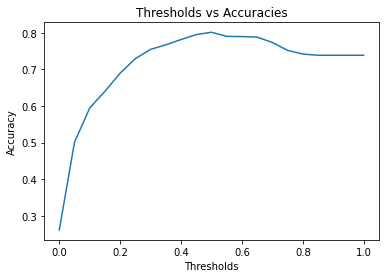

In [259]:
#we only check the accuracy for 0.5 threshold let us look our accuracy with different thresholds.
thresholds = np.linspace(0,1,21)
accuracies = []
for i in thresholds:
  acc = accuracy_score(y_val , y_pred >= i)
  accuracies.append(acc)
fig = plt.figure()
plt.plot(thresholds,accuracies)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")
plt.title("Thresholds vs Accuracies")
plt.show()

In [260]:
#The best threshold is 0.5 and we can not achieve more than 80% accuracy with this model.

80% is actually a decent number but to see if its actually a good number , we need another model to compare it.

####Dummy Baseline

In [261]:
#we will make a model that will predict a false value for each customer
size_val = len(y_val)
baseline = np.repeat(False , size_val)
baseline

array([False, False, False, ..., False, False, False])

In [262]:
accuracy_score(baseline , y_val)

0.7387096774193549

In [263]:
#As we can see our dummy model is also 73.8% accurate. While our original model is only 6% better.
#Going throug all this process only increase of 6% is not good.

###Confusion Table

In [264]:
#Everytime accuracy is not a good metric to evaluate model. With imbalanced dataset like ours, we need 
#another metric to evalute our model. 
t=0.5
predict_churn = y_pred>=0.5
predict_nochurn = y_pred<0.5

actual_churn = y_val==1
actual_nochurn = y_val==0

TN = (predict_nochurn&actual_nochurn).sum()
FN = (predict_churn&actual_nochurn).sum()
TP = (predict_churn&actual_churn).sum()
FP = (predict_nochurn&actual_churn).sum()

confusion_table = np.array(
    [[TN , FP],
     [FN, TP ]]
)
print(confusion_table)

[[1202  197]
 [ 172  289]]


In [265]:
#We can convert into percentages
confusion_table/confusion_table.sum()

array([[0.64623656, 0.10591398],
       [0.09247312, 0.15537634]])

In [266]:
#We can see that our model good job predicting people who will not churn but it do really bad in 
#predicting people who will churn

In [267]:
#we can evaluate our model for different threshold using confusion table
def tpr_fpr_dataframe(y_val ,y_pred):
  scores = []
  thresholds = np.linspace(0,1,101)
  for  t in thresholds:
    tp = ((y_pred>=t) &( y_val==1)).sum()
    tn = ((y_pred<t) & (y_val==0)).sum()
    fp = ((y_pred>=t) & (y_val==0)).sum()
    fn = ((y_pred<t) & (y_val==1)).sum()
    scores.append((t,tp,tn,fp,fn))
  #change to df for readibilty
  df_scores = pd.DataFrame(scores)
  df_scores.columns = ['threshold','tp','tn','fp','fn']
  df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
  df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)
  return df_scores

In [268]:
tpr_fpr_df = tpr_fpr_dataframe(y_val,y_pred)
tpr_fpr_df[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,486,0,1374,0,1.000000,1.000000
10,0.1,458,648,726,28,0.942387,0.528384
20,0.2,421,862,512,65,0.866255,0.372635
30,0.3,380,1024,350,106,0.781893,0.254731
40,0.4,337,1117,257,149,0.693416,0.187045
50,0.5,289,1202,172,197,0.594650,0.125182
60,0.6,200,1269,105,286,0.411523,0.076419
70,0.7,99,1340,34,387,0.203704,0.024745
80,0.8,7,1373,1,479,0.014403,0.000728
90,0.9,0,1374,0,486,0.000000,0.000000


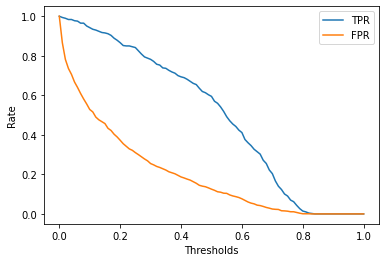

In [269]:
plt.plot(tpr_fpr_df.threshold , tpr_fpr_df.tpr , label = 'TPR')
plt.plot(tpr_fpr_df.threshold , tpr_fpr_df.fpr , label = 'FPR')
plt.xlabel("Thresholds")
plt.ylabel("Rate")
plt.legend()

At 0 threshold all true positive and false positive rate is 100%
TPR is 100% because we are classifying every customer as churning, so for every churned customer our model will also predict it to be churned.
FPR is 100% because we are e are classifying every customer as churning, so for every non churned customer our model will also predict it to be churned.

#####The random model

In [270]:
#now let us compare these rates with two baseline models.
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.00,486,0,1374,0,1.000000,1.000000
1,0.01,481,13,1361,5,0.989712,0.990539
2,0.02,473,33,1341,13,0.973251,0.975983
3,0.03,470,51,1323,16,0.967078,0.962882
4,0.04,467,67,1307,19,0.960905,0.951237
...,...,...,...,...,...,...,...
96,0.96,19,1319,55,467,0.039095,0.040029
97,0.97,16,1331,43,470,0.032922,0.031295
98,0.98,11,1350,24,475,0.022634,0.017467
99,0.99,4,1364,10,482,0.008230,0.007278


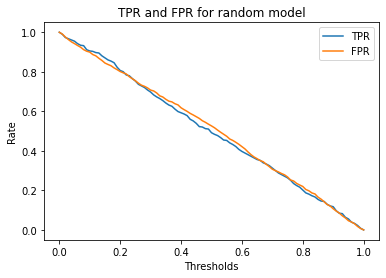

In [271]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.xlabel("Thresholds")
plt.ylabel("Rate")
plt.title("TPR and FPR for random model")
plt.legend() 

#####The ideal model

In [272]:
#The ideal model is a model that always makes correct predictions. 
num_neg = (y_val==0).sum()
num_pos = (y_val==1).sum()
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_pred_ideal = np.linspace(0,1,num_neg+num_pos)
df_ideal = tpr_fpr_dataframe(y_ideal , y_pred_ideal)
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,486,0,1374,0,1.000000,1.000000
10,0.1,486,186,1188,0,1.000000,0.864629
20,0.2,486,372,1002,0,1.000000,0.729258
30,0.3,486,558,816,0,1.000000,0.593886
40,0.4,486,744,630,0,1.000000,0.458515
50,0.5,486,930,444,0,1.000000,0.323144
60,0.6,486,1116,258,0,1.000000,0.187773
70,0.7,486,1302,72,0,1.000000,0.052402
80,0.8,372,1374,0,114,0.765432,0.000000
90,0.9,186,1374,0,300,0.382716,0.000000


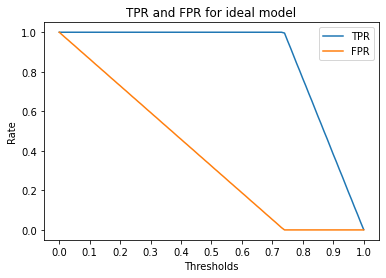

In [273]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label="TPR")
plt.plot(df_ideal.threshold , df_ideal.fpr , label="FPR")
plt.xticks(np.arange(0, 1+0.1, 0.1))
plt.xlabel("Thresholds")
plt.ylabel("Rate")
plt.title("TPR and FPR for ideal model")
plt.legend()

Both tpr and fpr starts at 1 and end at 0. for threshold less than 0.74, our model always correctly predict customer who churned. Also 0.74 is the ideal thershold for this model because at htis threshold our model correctly predict all customer who churned and correctly predicted the customer not churned, as false positive is 0.

###ROC Curve

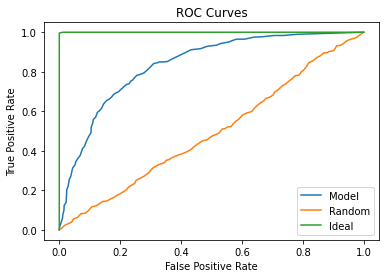

In [274]:
#Now we will plot roc curve for our three models
plt.plot(tpr_fpr_df.fpr , tpr_fpr_df.tpr,label="Model")
plt.plot(df_rand.fpr , df_rand.tpr , label = "Random")
plt.plot(df_ideal.fpr , df_ideal.tpr , label ="Ideal" )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()

No handles with labels found to put in legend.


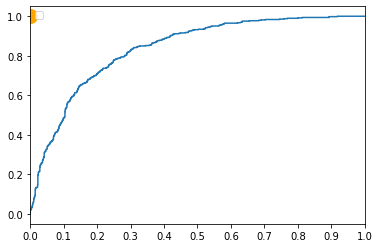

In [275]:
#We only need roc curve for our actual model, ideal model is not achievable in real world
fpr , tpr , thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr,tpr)
plt.xticks(np.arange(0,1+0.1,0.1))
plt.xlim(0,1)
plt.legend()
plt.scatter(0 , 1 , s=200,c='orange')


the ideal point for an roc curve is orange point 

###AUC Score

In [276]:
#now we will calculate auc for our model.


In [277]:
auc(tpr_fpr_df.fpr,tpr_fpr_df.tpr)

0.8359001084215382

In [278]:
#the auc score of 0.83 is good, but we can even increase it by doing parameter tuning.


###Parameter Tuning

####K fold cross validation

In [279]:
#first we will make a function for training data, so we dont have to repeat it.
def train(df,y,C):
  cat = df[categorical+numerical].to_dict("records")
  dv = DictVectorizer(sparse=False)
  dv.fit(cat)
  X = dv.transform(cat)
  model = LogisticRegression(solver = "liblinear",C=C)
  model.fit(X,y)
  return dv, model


In [280]:
#also for predicting process, we make a function
def predict(df, dv , model):
  cat = df[categorical+numerical].to_dict("records")
  X = dv.transform(cat)
  y_pred = model.predict_proba(X)[:,1]
  return y_pred


In [281]:
kfold = KFold(n_splits=10,shuffle=True , random_state=1)
aucs = []
for train_idx , val_idx in kfold.split(df_train_full):
  df_train = df_train_full.iloc[train_idx]
  df_val = df_train_full.iloc[val_idx]
  y_train = df_train.churn.values
  y_val = df_val.churn.values

  dv,model = train(df_train, y_train, C=1)
  y_pred = predict(df_val , dv, model)
  auc = roc_auc_score(y_val, y_pred)
  aucs.append(auc)

In [282]:
aucs

[0.8493392490816277,
 0.8413366336633662,
 0.8590269587894291,
 0.8330260883877869,
 0.8242555831265509,
 0.8416250416250417,
 0.8437154021491371,
 0.8223355471220746,
 0.8450570623981029,
 0.8611811367685119]

In [283]:
print('auc = %0.3f ± %0.3f'% (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [284]:
#now we know the avg performance of our model and how much it deviates for different train and validation sets

In [285]:
#now let us look into auc scores for different parameters

kfold = KFold(n_splits=10,shuffle=True , random_state=1)
for c in [0.001, 0.01, 0.1, 0.5, 1, 10]:
  aucs = []
  for train_idx , val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv,model = train(df_train, y_train,c)
    y_pred = predict(df_val , dv, model)
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
  print('C = %s auc = %0.3f ± %0.3f'% (c , np.mean(aucs), np.std(aucs)))

C = 0.001 auc = 0.826 ± 0.016
C = 0.01 auc = 0.840 ± 0.012
C = 0.1 auc = 0.842 ± 0.012
C = 0.5 auc = 0.842 ± 0.012
C = 1 auc = 0.842 ± 0.012
C = 10 auc = 0.842 ± 0.012


In [286]:
#We can see that for C>0.1 auc score does'nt grow anymore. So we use C=0.1 as our final parameter
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full , y_train , C=0.1)
y_pred = predict(df_test , dv , model )

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f'%auc)

auc = 0.858


In [287]:
#As the score is pretty good and slightly better than previous auc score. so we can use this model on real 
#world problem

In [288]:
#We can also see weights attached to each variable
dict(zip(dv.get_feature_names_out() , model.coef_[0].round(3)))

{'contract=month-to-month': 0.501,
 'contract=one_year': -0.152,
 'contract=two_year': -0.483,
 'dependents=no': -0.043,
 'dependents=yes': -0.091,
 'deviceprotection=no': 0.046,
 'deviceprotection=no_internet_service': -0.109,
 'deviceprotection=yes': -0.072,
 'gender=female': -0.051,
 'gender=male': -0.083,
 'internetservice=dsl': -0.337,
 'internetservice=fiber_optic': 0.312,
 'internetservice=no': -0.109,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.209,
 'multiplelines=no_phone_service': 0.101,
 'multiplelines=yes': -0.026,
 'onlinebackup=no': 0.091,
 'onlinebackup=no_internet_service': -0.109,
 'onlinebackup=yes': -0.117,
 'onlinesecurity=no': 0.192,
 'onlinesecurity=no_internet_service': -0.109,
 'onlinesecurity=yes': -0.217,
 'paperlessbilling=no': -0.211,
 'paperlessbilling=yes': 0.077,
 'partner=no': -0.102,
 'partner=yes': -0.032,
 'paymentmethod=bank_transfer_(automatic)': -0.095,
 'paymentmethod=credit_card_(automatic)': -0.115,
 'paymentmethod=electronic_check': 0.20

##Real World Application

In [289]:
#Now let us assume following are the attributes of our customer, we like to know if the customer 
#will leave us soon or not
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes', 
  'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}


In [290]:
#now we can make a function to predict a single customer
def predict_single(customer , dv , model):
  X = dv.transform(customer)
  y_pred = model.predict_proba(X)[:,1]
  return y_pred[0]

In [291]:
predict_single(customer , dv , model)

0.06208480874760368

In [292]:
#this customer has 6% probablity of churning

In [211]:
#Our customer will not churn so we will not send promotional discounts, emails etc to this customer

##Serving the model

In [294]:
#first we will save the model and dict vectorizer
with open('churn-model.bin', 'wb') as f_out:
  pickle.dump((dv , model) , f_out)


In [295]:
#now we will load our model
with open('churn-model.bin' ,'rb') as f_in:
  dv,model = pickle.load(f_in)

In [307]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes', 
  'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}
url = 'http://localhost:9696/predict' #A
response = requests.post(url, json=customer) #B
result = response.json() 


In [308]:
result

{'churn': False, 'churn probablity': 0.06208480874760368}

We have trained our model using logistic regression, for this purpose we first prepare our features and convert them to vectors using DictVectorizer method from sklearn. We also used risk ratios to find the risk of  value in a categorical variable to churn. We also used mutual info scores and coefficient to check the dependacy of attributes on target variable.
We perform mutiple evaluation check on our model by preparinf confusion tables, roc_auc_scores and seeing the result in form of graph. 
Then we learn our model on different parameters and found the one that maximizes our auc_score.
This model is great for business to know beforehand that which customers are going to leave soon and how businesses can sustain these customers.